In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('random_1000.csv', delimiter=',')
df.head()

,pvsnr,vsnr,vm,aktiv,spartek,vtr_dau,vtrweg,STORNGRD,gesbeitr,SDANZAHL,...,beg_month,beg_day,gfeld_c,ort_id,anr_no,gender_id,plz_id,Customer_beg_year,Electric,car_model
0,96530185,96530185-002,00 000 1357,0,3,1.011,4,NaN,"36,48",0.0,...,1,19,70270,8045,71295,1,5718,2015.0,1,567
1,26093931,26093931-002,00 000 1769,1,2,820.000,2,NaN,"34,41",0.0,...,1,1,70270,5476,71295,1,5679,2023.0,1,200
2,26171114,26171114-001,00 000 9420,1,1,759.000,2,NaN,"541,31",0.0,...,3,3,70270,5365,71295,1,7991,2023.0,1,803
3,6023000,06023000-012,00 000 1755,1,2,30.000,1,NaN,39.3,0.0,...,3,1,70270,211,71295,1,136,1983.0,1,0
4,25133216,25133216-002,00 000 1357,0,3,365.000,4,NaN,"170,15",0.0,...,1,1,70270,1041,71295,1,12597,2019.0,1,4145


In [4]:
df.info()
df.isnull().sum().sort_values(ascending=False)[:10]
# Replace commas in numeric columns and convert to float
for col in ['gesbeitr', 'SCHAGESA', 'KOSTGESA', 'KOSTGEKA', 'kosten_verw', 'kosten_prov', 'SDBEITR5']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')
# Fill missing values with 0 for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(0)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pvsnr              1000 non-null   int64  
 1   vsnr               1000 non-null   object 
 2   vm                 1000 non-null   object 
 3   aktiv              1000 non-null   int64  
 4   spartek            1000 non-null   int64  
 5   vtr_dau            1000 non-null   float64
 6   vtrweg             1000 non-null   int64  
 7   STORNGRD           211 non-null    float64
 8   gesbeitr           1000 non-null   object 
 9   SDANZAHL           1000 non-null   float64
 10  SCHAGESA           1000 non-null   object 
 11  KOSTGESA           1000 non-null   object 
 12  KOSTGEKA           1000 non-null   object 
 13  kosten_verw        1000 non-null   object 
 14  kosten_prov        1000 non-null   object 
 15  plz                1000 non-null   int64  
 16  alter              1000 n

,pvsnr,vsnr,vm,aktiv,spartek,vtr_dau,vtrweg,STORNGRD,gesbeitr,SDANZAHL,...,beg_month,beg_day,gfeld_c,ort_id,anr_no,gender_id,plz_id,Customer_beg_year,Electric,car_model
0,96530185,96530185-002,00 000 1357,0,3,1.011,4,0.0,36.48,0.0,...,1,19,70270,8045,71295,1,5718,2015.0,1,567
1,26093931,26093931-002,00 000 1769,1,2,820.000,2,0.0,34.41,0.0,...,1,1,70270,5476,71295,1,5679,2023.0,1,200
2,26171114,26171114-001,00 000 9420,1,1,759.000,2,0.0,541.31,0.0,...,3,3,70270,5365,71295,1,7991,2023.0,1,803
3,6023000,06023000-012,00 000 1755,1,2,30.000,1,0.0,39.30,0.0,...,3,1,70270,211,71295,1,136,1983.0,1,0
4,25133216,25133216-002,00 000 1357,0,3,365.000,4,0.0,170.15,0.0,...,1,1,70270,1041,71295,1,12597,2019.0,1,4145


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pvsnr              1000 non-null   int64  
 1   vsnr               1000 non-null   object 
 2   vm                 1000 non-null   object 
 3   aktiv              1000 non-null   int64  
 4   spartek            1000 non-null   int64  
 5   vtr_dau            1000 non-null   float64
 6   vtrweg             1000 non-null   int64  
 7   STORNGRD           1000 non-null   float64
 8   gesbeitr           1000 non-null   float64
 9   SDANZAHL           1000 non-null   float64
 10  SCHAGESA           1000 non-null   float64
 11  KOSTGESA           1000 non-null   float64
 12  KOSTGEKA           1000 non-null   float64
 13  kosten_verw        1000 non-null   float64
 14  kosten_prov        1000 non-null   float64
 15  plz                1000 non-null   int64  
 16  alter              1000 n

In [6]:
drop_cols = ['pvsnr', 'vsnr', 'vm', 'aktiv']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['aktiv']
# Encode categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00       132

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



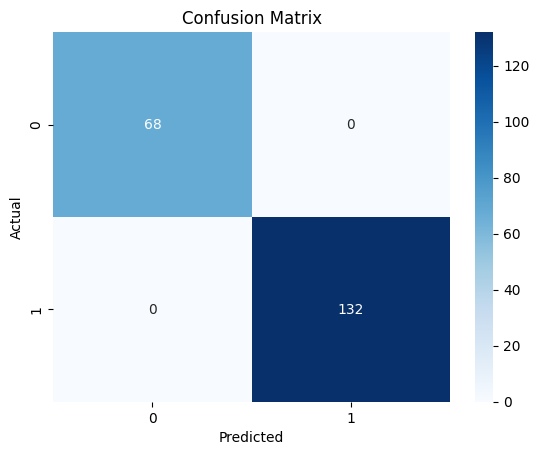

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
all_preds = model.predict(X_scaled)
unique, counts = np.unique(all_preds, return_counts=True)
result = dict(zip(unique, counts))
print(f'Predicted to stay (aktiv=1): {result.get(1, 0)}')
print(f'Predicted to exit (aktiv=0): {result.get(0, 0)}')

Predicted to stay (aktiv=1): 662
Predicted to exit (aktiv=0): 338


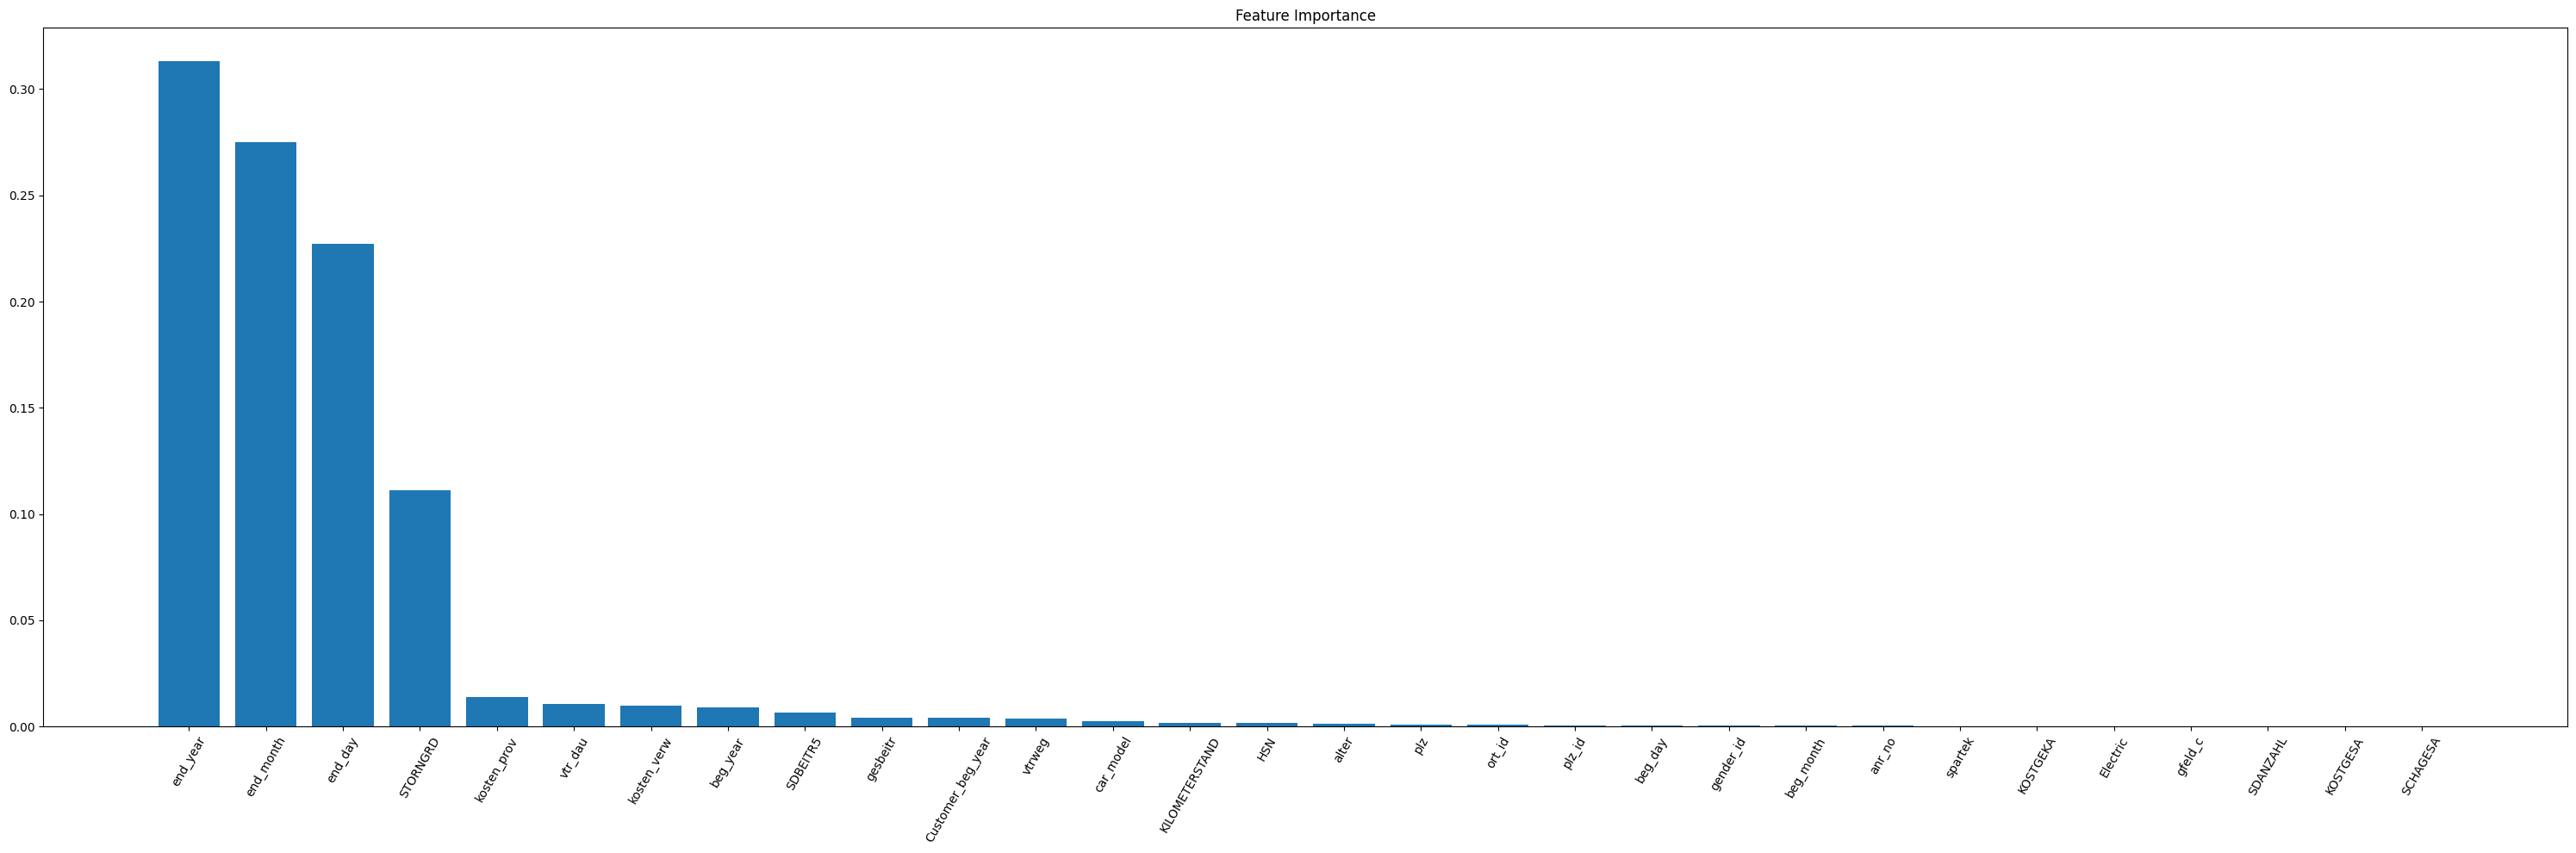

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = model.feature_importances_

# Get indices that would sort the importances (descending)
sorted_indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(30, 10))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=60)
plt.tight_layout()
plt.show()